<a href="https://colab.research.google.com/github/garfield-gray/Soft-Computing/blob/main/MNSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
ObjF_S1 = lambda x: np.power(x[:,0]+5,2) + np.power(x[:,1]+5,2) -10*np.cos(2*np.pi*x[:,0]) -10*np.cos(2*np.pi*x[:,1]) + 20

In [ ]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt

# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 30                # Maximum Number of iterations
OBJ_F = ObjF_S1           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = ObjF_S1(x)
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)
  #making sure we're in right bounderies
  #evaluation
  #save the best
  #plot


In [31]:
mean = [0, 0]
cov = [[10, -20], [-20, 10]]
X = np.append(cov, [[0,0]], axis=0)
X

array([[ 10, -20],
       [-20,  10],
       [  0,   0]])

In [32]:
X = np.append(X, np.random.multivariate_normal(mean, cov, 10), axis=0)

<ipython-input-32-f7be4c3cd992>:1: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.append(X, np.random.multivariate_normal(mean, cov, 10), axis=0)


In [39]:
np.cov(X.T)

array([[ 59.28956793, -47.52984415],
       [-47.52984415,  61.00541062]])

<ipython-input-21-b6090ded206c>:2: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(mean, cov, 5000).T


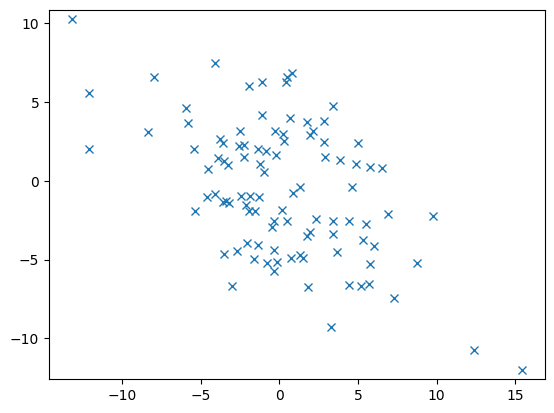

In [21]:
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(X[:,0], X, 'x')
plt.axis('equal')
plt.show()

In [ ]:
f

array([140.49709883,  48.31125139, 160.27244409, 189.31447375,
        82.79087567,  49.42450815,  54.18988736, 137.73141219,
       287.30117124, 232.18981978,  55.00610439, 177.00659014,
       133.61767566, 252.97949041,  83.53540527, 183.72831741,
       213.76063094, 126.2610358 , 138.99381216, 374.66254257,
        66.18820935,  42.7948375 , 219.22246011, 149.97904846,
        16.65749322, 274.53358499,  94.85092872,  90.58807696,
       155.02569501,  71.06804908,  22.95769933, 245.39108726,
        26.36749869, 159.62233434,  90.3733841 ,  82.47917721,
       157.85268813,  55.4785747 , 255.91547449,  48.24086868,
       125.00495422, 203.00261551,  70.84383939,  42.12606187,
        67.55593019,  49.3997585 ,  87.8614093 , 237.21270658,
       212.20998912,  80.8305266 , 219.2445265 , 122.19812205,
       113.06574989, 255.6140129 , 158.78792324, 140.35427696,
        92.7063358 , 166.18419152, 134.05372229, 357.195659  ,
       167.61538767, 225.93762054,  56.79366032,   9.04

In [ ]:
ind = np.argsort(f)

In [ ]:
2*np.var(x[ind[:NS]], axis = 0)

array([13.43193994, 11.19573765])

In [ ]:
x[ind[:NS]]

array([[-5.08602475, -6.84867873],
       [-3.1647096 , -3.16733975],
       [-3.4174419 , -5.09585516],
       [-7.81219038, -1.88362826],
       [-8.75491864, -3.63780156],
       [-7.27332355, -2.46292154],
       [-2.45494353, -1.21531281],
       [-2.96479473,  0.73315416],
       [-4.82925083,  1.18305507],
       [ 0.02778385, -0.80822119]])

In [ ]:
np.cov(x[ind[:NS]].T)

array([[7.46218886, 1.74592659],
       [1.74592659, 6.21985425]])

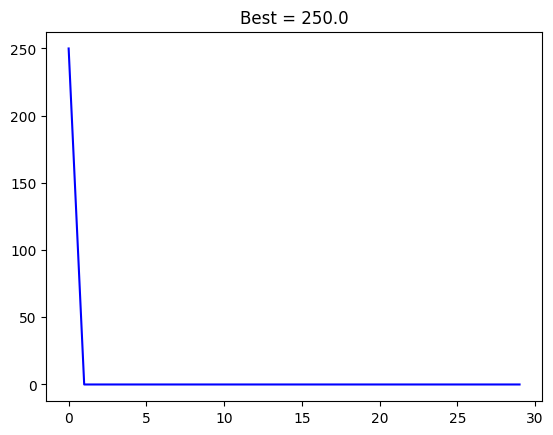

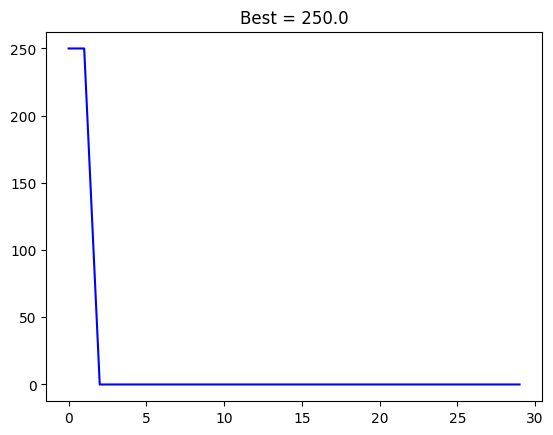

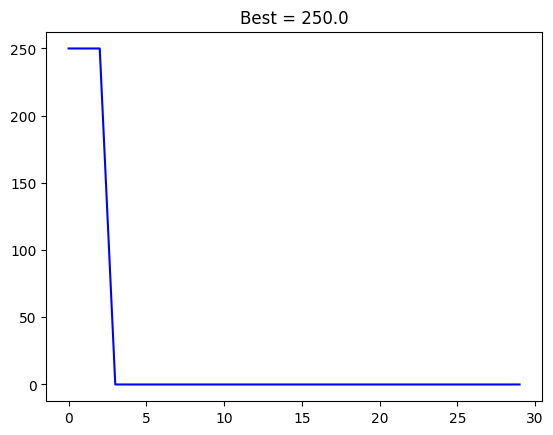

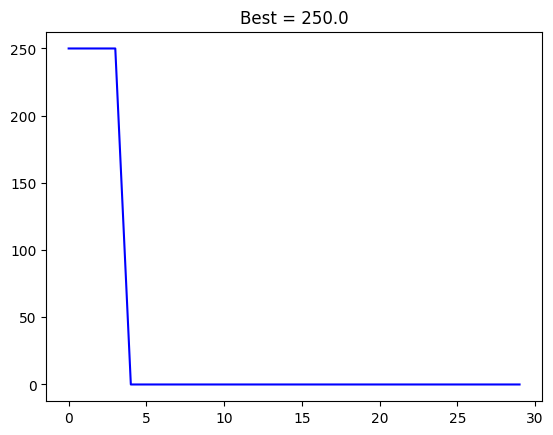

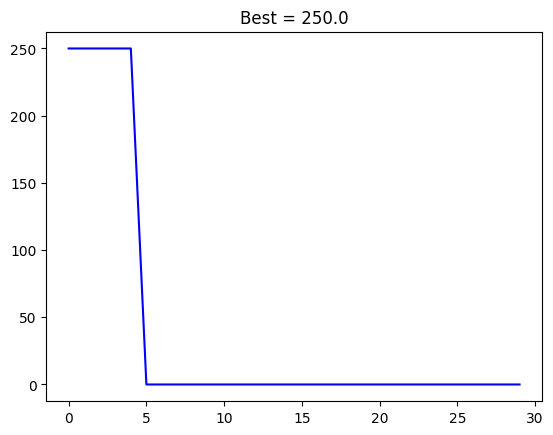

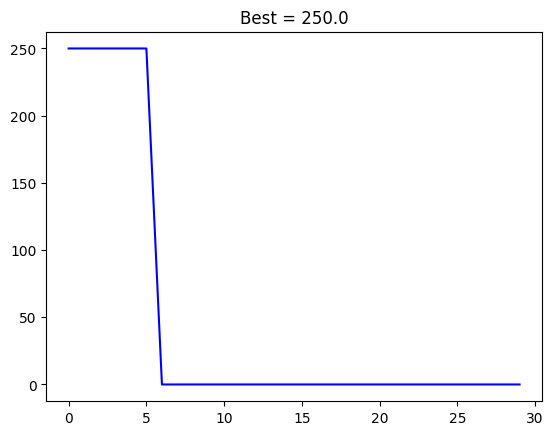

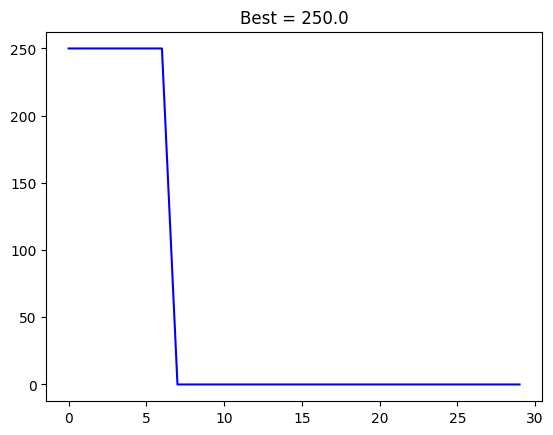

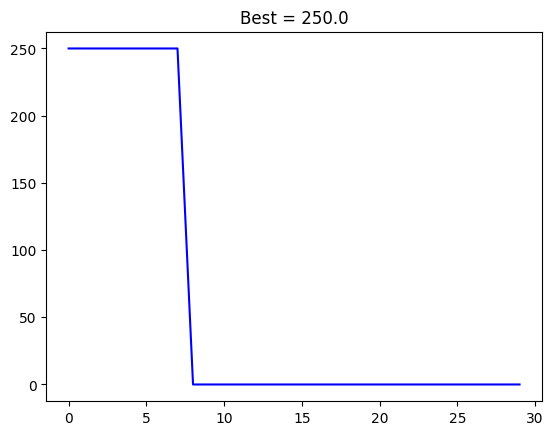

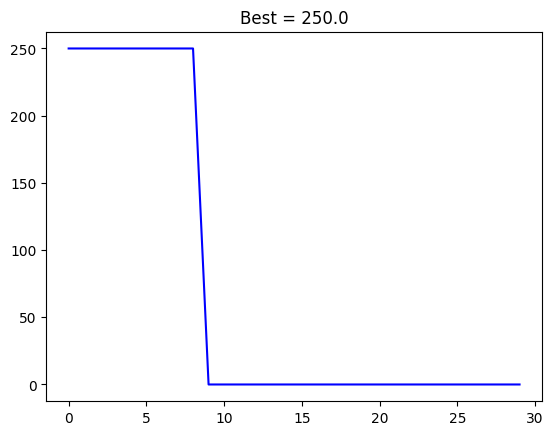

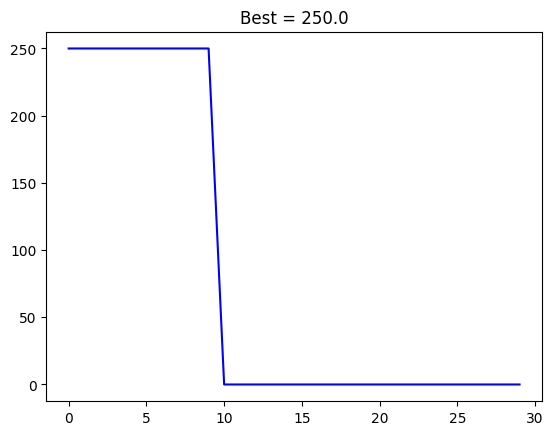

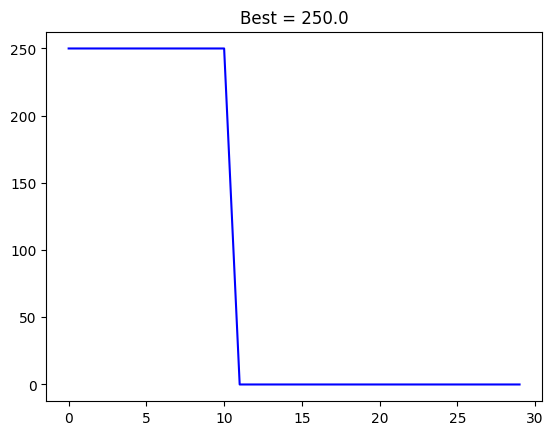

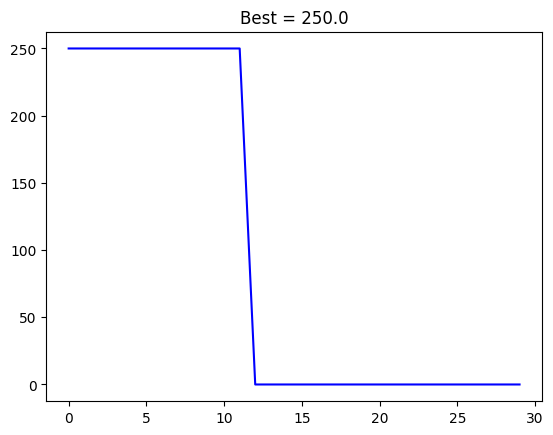

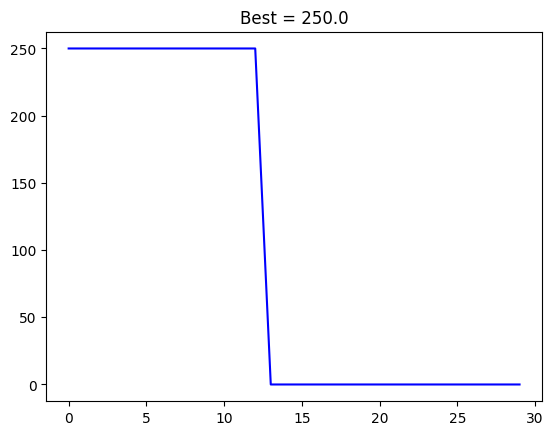

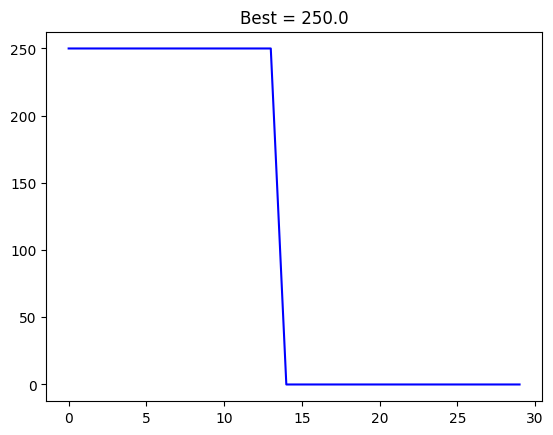

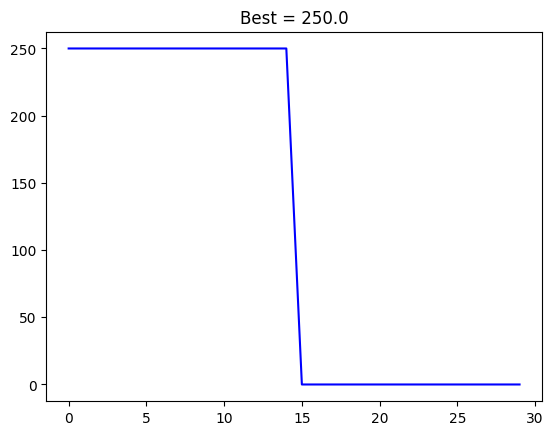

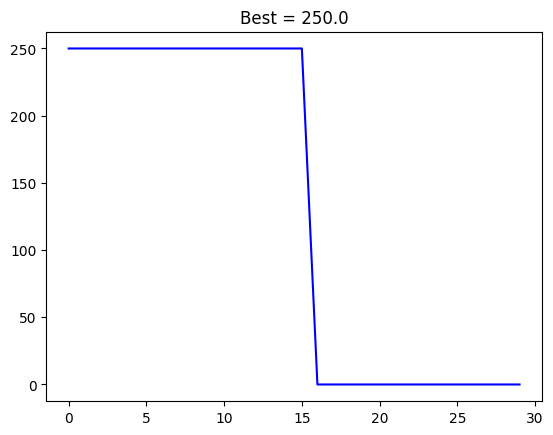

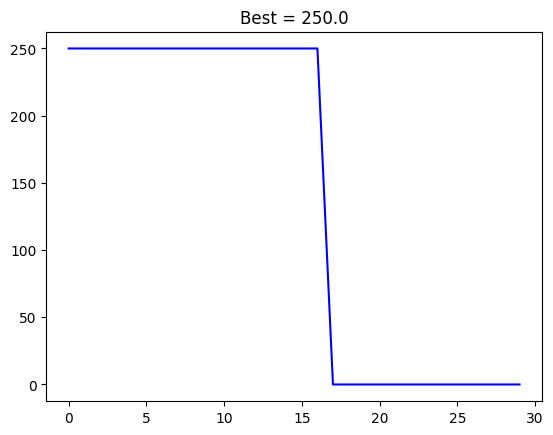

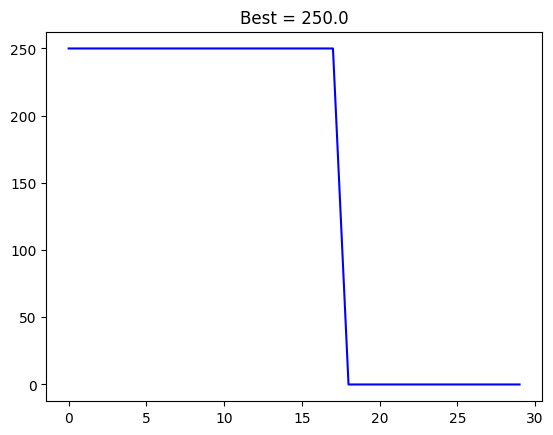

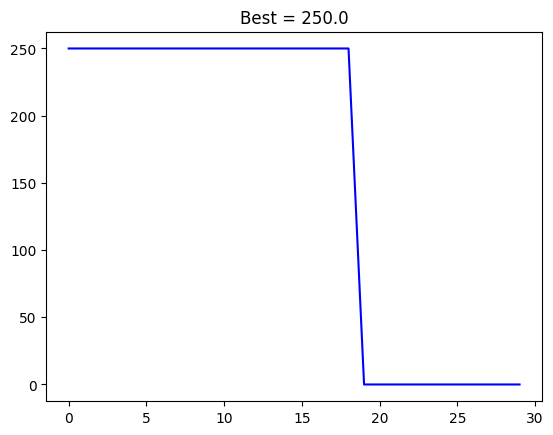

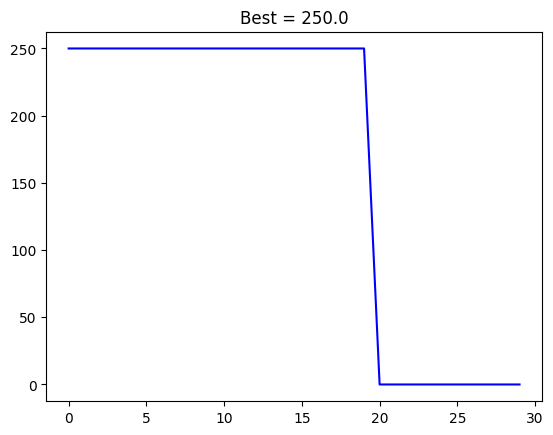

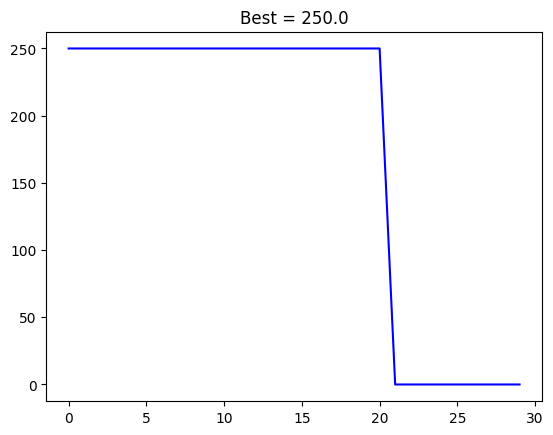

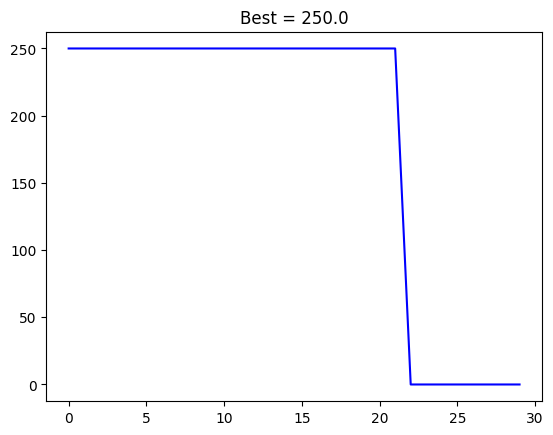

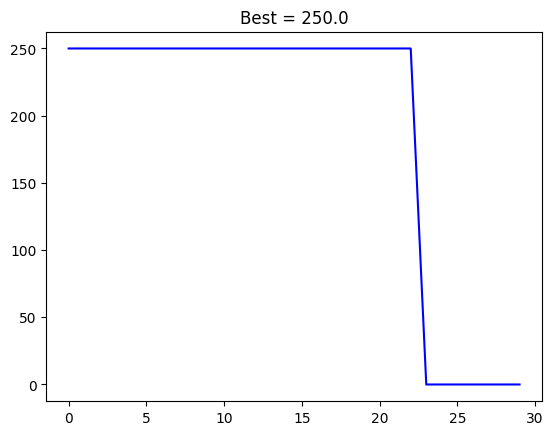

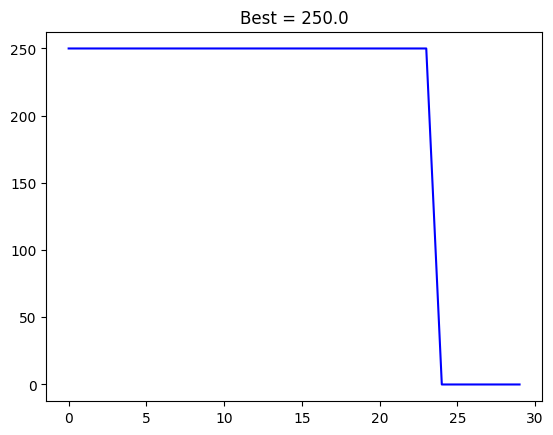

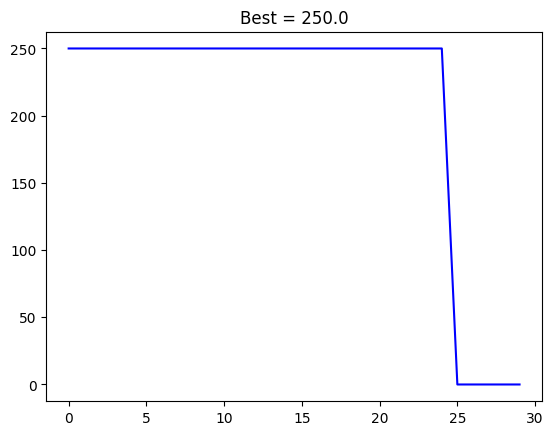

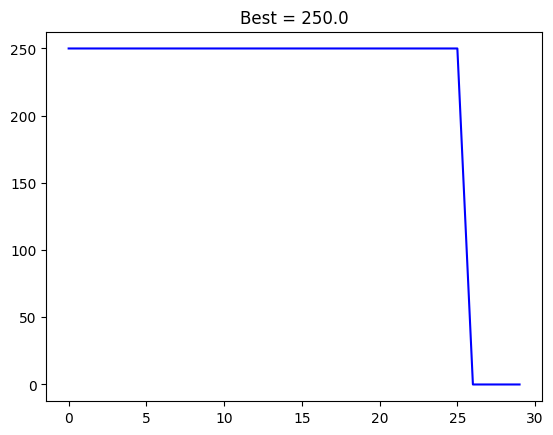

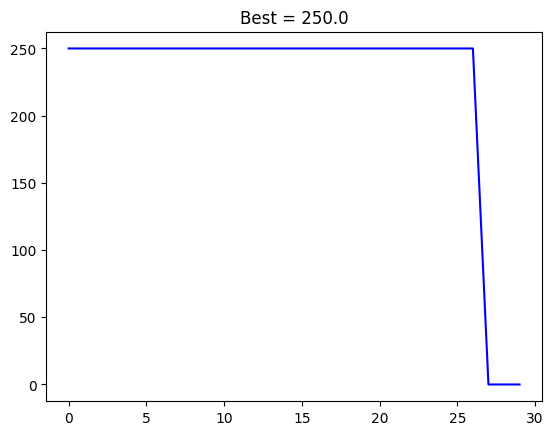

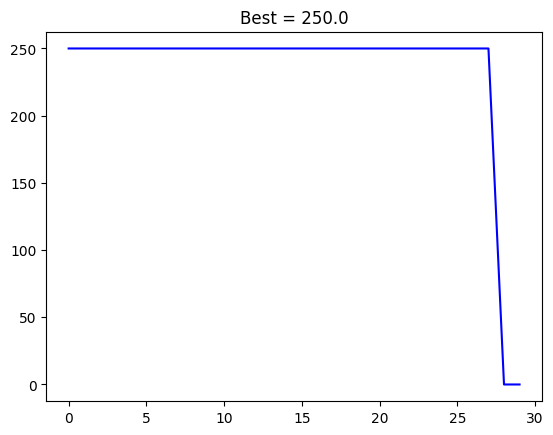

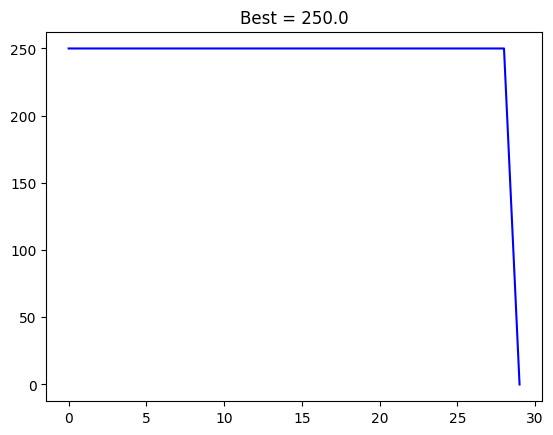

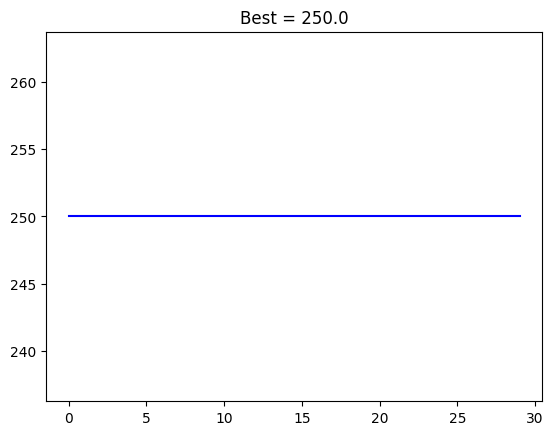

xmin: [-10.  10.]
fmin: 250.0


In [ ]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt

# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                   # Number of samples
MAXIT = 30                # Maximum Number of iterations
OBJ_F = 'ObjF_S1'         # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables

# Initialization
NP = NS * (NS + 3) // 2
R1 = np.tile(R[0, :], (NP, 1))
R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R1, R2)
f = np.apply_along_axis(ObjF_S1, 1, x)
# Main loop
Best = np.zeros(MAXIT)
for it in range(MAXIT):
    indices = np.argsort(f)
    x = x[indices[:NS], :]
    a = (0.3) ** (it / MAXIT)
    z = a * np.var(x, axis=0)

    for i in range(NS):
        x = np.vstack([x, np.random.multivariate_normal(x[i, :], np.diag(z), NS + 1 - i)])

    R1 = np.tile(R[0, :], (x.shape[0], 1))
    R2 = np.tile(R[1, :], (x.shape[0], 1))

    x = np.clip(x, R1, R2)
    f = np.apply_along_axis(ObjF_S1, 1, x)

    fb, j = np.min(f), np.argmin(f)
    xb = x[j, :]
    Best[it] = fb

    plt.plot(Best, 'b-')
    plt.title('Best = ' + str(Best[it]))
    plt.show()

xmin, fmin = xb, fb
print('xmin:', xmin)
print('fmin:', fmin)


In [ ]:
# it sucks!

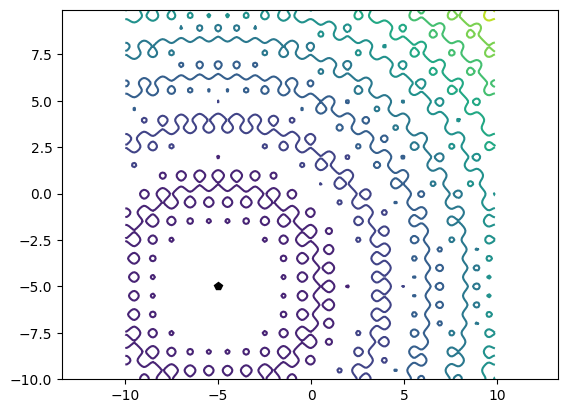

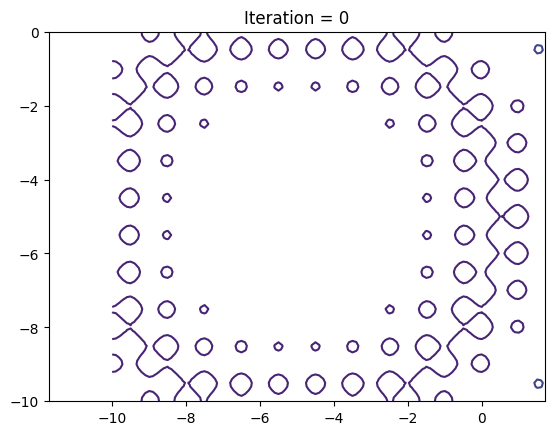

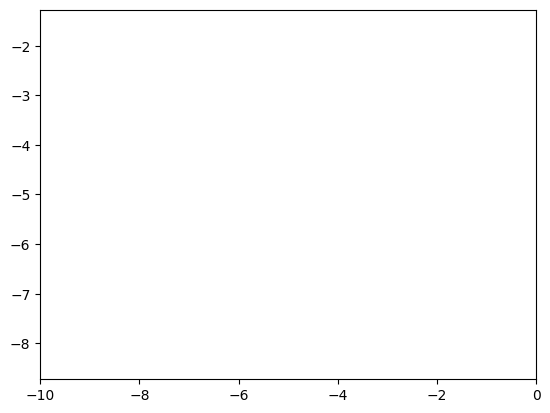

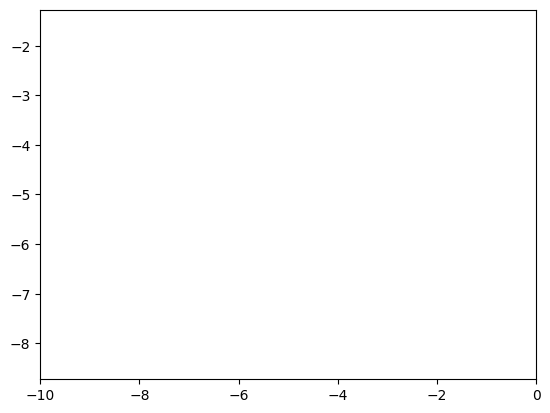

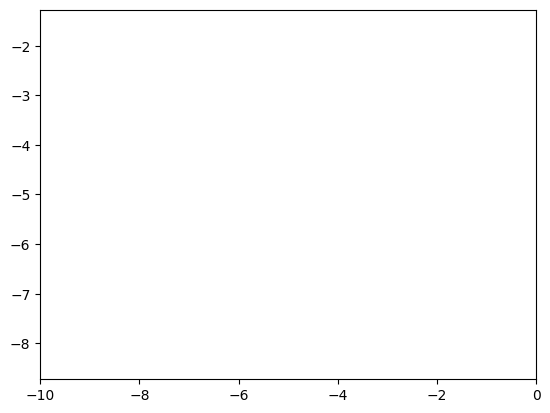

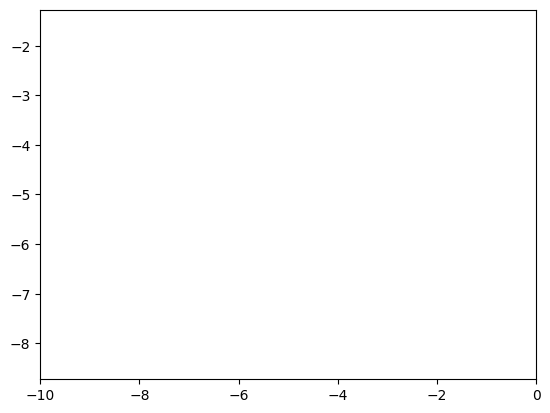

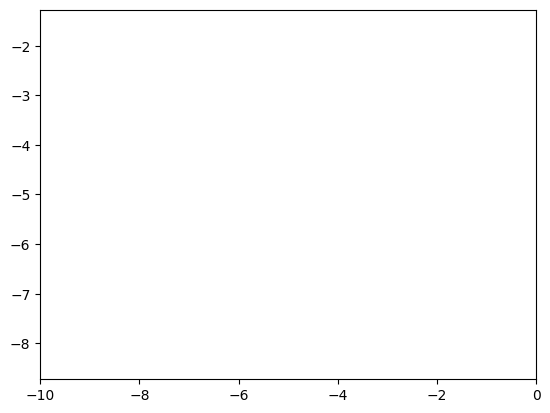

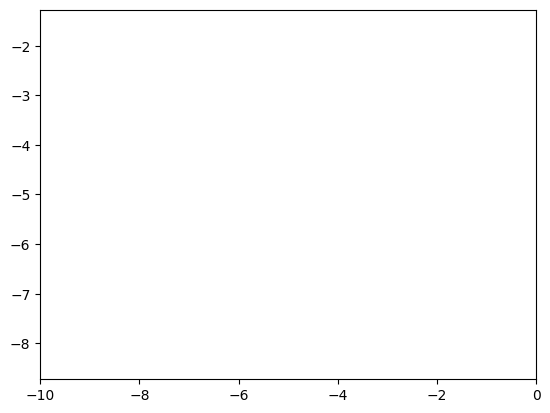

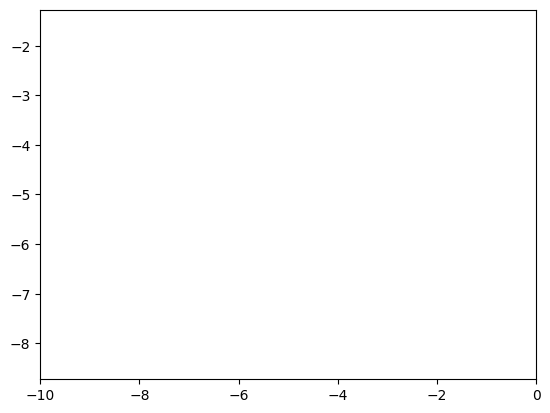

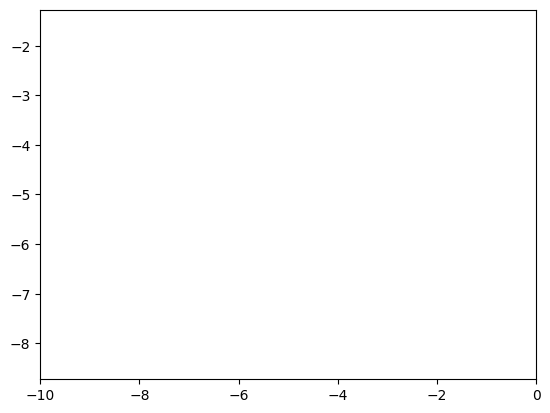

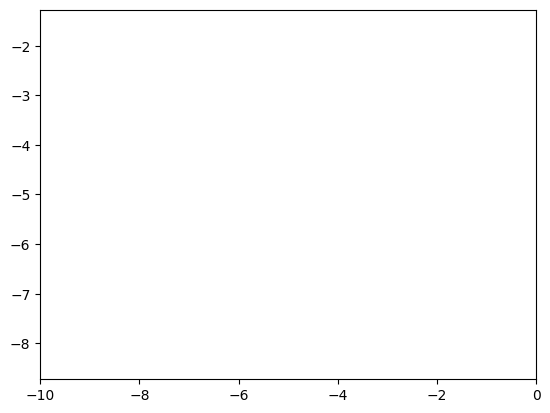

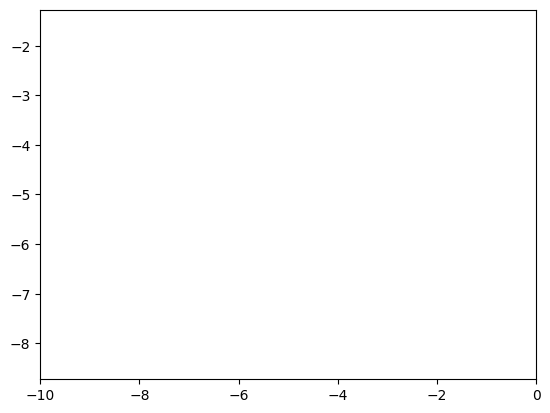

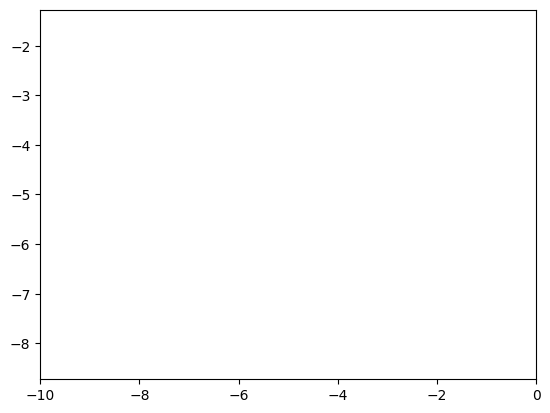

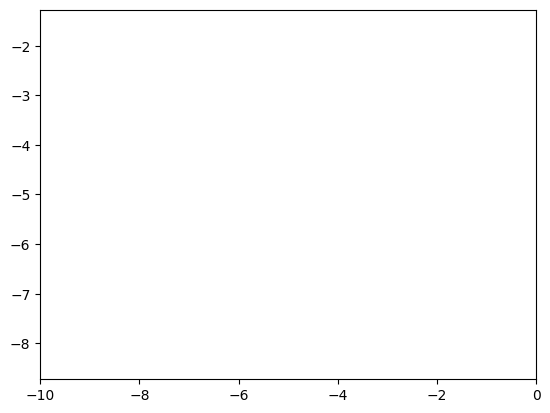

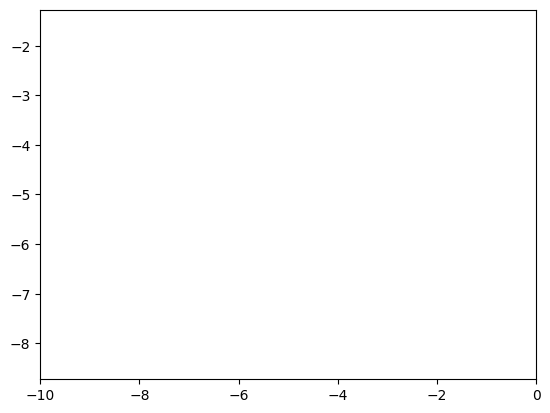

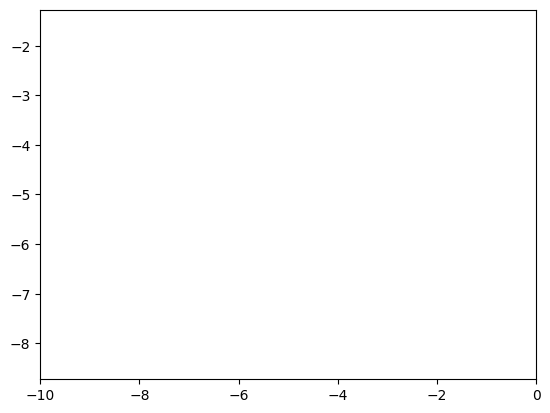

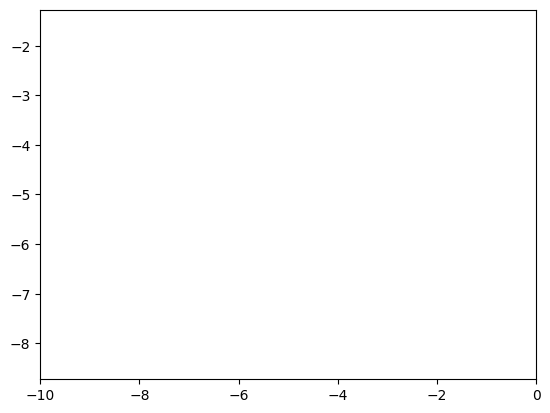

ValueError: operands could not be broadcast together with shapes (150,2) (135,2) (135,2) 

In [ ]:
# MNSV_S1_2.m


import numpy as np
import matplotlib.pyplot as plt

# Define the objective function ObjF_S1
def ObjF_S1(C):
    return np.sum((C + 5)**2 - 10 * np.cos(2 * np.pi * C)) + 20

# Define MNSV Parameters
N = 2                     # Number of variables
NS = 15                   # Number of samples
MAXIT = 30                # Maximum Number of iterations
OBJ_F = 'ObjF_S1'         # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables

# Contour plot setup
xx = np.arange(-10, 10, 0.1)
yy = np.arange(-10, 10, 0.1)
P, Q = np.meshgrid(xx, yy)
F = (P + 5)**2 - 10 * np.cos(2 * np.pi * P) + (Q + 5)**2 - 10 * np.cos(2 * np.pi * Q) + 20

# Plot initial contour and point
plt.contour(xx, yy, F, 10)
plt.plot(-5, -5, 'kp')
plt.axis('equal')
plt.show()
plt.pause(0.5)

# Initialization
NP = int(NS * (NS + 3) / 2)
R1 = np.tile(R[0, :], (NP, 1))
R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R1, R2)
f = np.apply_along_axis(ObjF_S1, 1, x)

# Main loop
Best = np.zeros(MAXIT)
for it in range(MAXIT):
    indices = np.argsort(f)
    x = x[indices[:NS], :]

    # Plot current iteration
    plt.clf()
    plt.contour(xx, yy, F, 10)
    plt.title('Iteration = ' + str(it))
    plt.plot(x[:, 0], x[:, 1], 'r*')
    plt.axis('equal')
    plt.axis([-10, 0, -10, 0])
    plt.show()
    plt.pause(0.5)

    a = (0.3) ** (it / MAXIT)
    z = a * np.var(x, axis=0)

    # Plot ellipses
    t = np.arange(0, 2 * np.pi, 0.01)
    for i in range(NS):
        x1 = x[i, 0] + np.sqrt(z[0]) * np.cos(t)
        y1 = x[i, 1] + np.sqrt(z[1]) * np.sin(t)
        plt.plot(x1, y1)
        plt.axis('equal')
        plt.axis([-10, 0, -10, 0])
        plt.pause(0.1)

    # Generate new samples
    for i in range(NS):
        x = np.vstack([x, np.random.multivariate_normal(x[i, :], np.diag(z), NS + 1 - i)])

    x = np.clip(x, R1, R2)
    f = np.apply_along_axis(ObjF_S1, 1, x)

    fb, j = np.min(f), np.argmin(f)
    xb = x[j, :]
    Best[it] = fb

    print("Iteration:", it + 1)
    print("xmin:", xb)
    print("fmin:", fb)
    print("----")

xmin, fmin = xb, fb
print('Final xmin:', xmin)
print('Final fmin:', fmin)
